## Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM
# from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from keras.preprocessing.sequence import TimeseriesGenerator
#import np.array as array



## Load Datasets
##### As Pandas DataFrame objects

In [2]:
# Load Dataset
#import csv as a pandas dataframe
training_path = "D:\OneDrive\OneDrive - University of Massachusetts Dartmouth\ECE457_Senior_Design_ECE5\CSV_Files\Training_Port1.csv"
test_path = "D:\OneDrive\OneDrive - University of Massachusetts Dartmouth\ECE457_Senior_Design_ECE5\CSV_Files\Test_Stbd1.csv"
df_train=pd.read_csv(training_path)
df_test=pd.read_csv(test_path)

In [3]:
df_train.shape


(5504457, 32)

In [4]:
df_train.head()


,Ping#,Sample#,Port/Stbd,SampleTimeDelay,I1,Q1,I2,Q2,I3,Q3,...,I10,Q10,Roll,C,DOA,TWTT,Amplitude,AngleUncertainty,SampleRate,Range
0,7,5,0,0.000061,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.488892,1492.04,-55.809999,0.000061,0,0,65108.40625,0.045832
1,7,6,0,0.000077,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.488892,1492.04,-55.809999,0.000077,0,0,65108.40625,0.057291
2,7,7,0,0.000092,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.488892,1492.04,-55.809999,0.000092,0,0,65108.40625,0.068749
3,7,8,0,0.000108,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.488892,1492.04,-55.809999,0.000108,0,0,65108.40625,0.080207
4,7,9,0,0.000123,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.488892,1492.04,-55.809999,0.000123,0,0,65108.40625,0.091665


In [ ]:
# Model Configuration
#addition_metrics = ['accuracy']
#batch_size = 128
#embedding_output_dims = 15
#loss_function = MeanSquaredError()
#max_sequence_length = 300
#num_distinct_words = 5000
#number_of_epochs = 5
#optimizer = Adam()
#validation_split = 0.20
#verbosity_mode = 1

# Function Declarations

In [5]:
# Function to get a given ping #'s data and put it into corresponding locations.
def GetPingNumber(pingnum, source):
    if (source == 'train'):
        df = df_train[df_train['Ping#']==pingnum]
    if (source == 'test'):
        df = df_test[df_test['Ping#']==pingnum]
        
    return df


In [6]:
# Function to get the important columns out of a dataframe object..
def GetColumns(in_df_obj, ColumnTypes):
    if (ColumnTypes == 'InputData'):
        df1 = in_df_obj.iloc[:,3:24]    #
        df2 = in_df_obj.iloc[:,28]      # 28 is Amplitude values
        df = pd.concat([df1, df2], axis=1)
        #df1 = in_df_obj[in_df_obj.iloc[:,3:24]]     # 3:24 contain the SampleTimeDelay and IQ vals.
        #df2 = in_df_obj[in_df_obj.iloc[:,29]]       # 29 is the Amplitude value
        #df = df1.append(df2)
        
    if (ColumnTypes == 'TrueData'):
        df = in_df_obj.iloc[:,26]                   # 26 is the DOA values
        #df = in_df_obj[in_df_obj.iloc[27]]
        #colRange1 = 
    return df


In [7]:
scaler = MinMaxScaler()

In [8]:
df_train.iat[0,0]


7

In [9]:
dfPing7 = GetPingNumber(7, 'train')
dfPing7

,Ping#,Sample#,Port/Stbd,SampleTimeDelay,I1,Q1,I2,Q2,I3,Q3,...,I10,Q10,Roll,C,DOA,TWTT,Amplitude,AngleUncertainty,SampleRate,Range
0,7,5,0,0.000061,0.000,0.000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.488892,1492.04,-55.809999,0.000061,0,0,65108.40625,0.045832
1,7,6,0,0.000077,0.000,0.000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.488892,1492.04,-55.809999,0.000077,0,0,65108.40625,0.057291
2,7,7,0,0.000092,0.000,0.000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.488892,1492.04,-55.809999,0.000092,0,0,65108.40625,0.068749
3,7,8,0,0.000108,0.000,0.000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.488892,1492.04,-55.809999,0.000108,0,0,65108.40625,0.080207
4,7,9,0,0.000123,0.000,0.000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.488892,1492.04,-55.809999,0.000123,0,0,65108.40625,0.091665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4292,7,4297,0,0.065982,-7.250,21.625,30.6875,38.4375,41.2500,-1.0000,...,-43.1875,43.0625,0.477905,1492.04,-80.494998,0.065982,96,30,65108.40625,49.224091
4293,7,4298,0,0.065998,-7.250,-46.625,-24.6875,4.1250,3.2500,34.1250,...,-14.8750,-16.5625,0.477905,1492.04,-82.389998,0.065998,84,142,65108.40625,49.235549
4294,7,4299,0,0.066013,52.750,-92.750,-59.1250,-94.7500,-96.3750,11.6875,...,84.0000,27.5000,0.477905,1492.04,-84.879998,0.066013,84,104,65108.40625,49.247007
4295,7,4300,0,0.066028,-8.875,-42.125,-55.8750,-18.3750,-36.6875,21.6250,...,71.6250,-2.4375,0.477905,1492.04,-80.299998,0.066028,98,36,65108.40625,49.258466


In [10]:
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_train_scaled['Ping#'] = df_train['Ping#']
df_train_scaled['SampleRate'] = df_train['SampleRate']
df_train_scaled['Range'] = df_train['Range']
df_train_scaled['C'] = df_train['C']
df_train_scaled['Port/Stbd'] = df_train['Port/Stbd']
#df_train_scaled['Sample#'] = df_train['Sample#']



df_test_scaled = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)
df_test_scaled['Ping#'] = df_test['Ping#']
df_test_scaled['SampleRate'] = df_test['SampleRate']
df_test_scaled['Range'] = df_test['Range']
df_test_scaled['C'] = df_test['C']
df_test_scaled['Port/Stbd'] = df_test['Port/Stbd']
#df_train_scaled['Sample#'] = df_train['Sample#']

In [11]:
df_train_scaled

,Ping#,Sample#,Port/Stbd,SampleTimeDelay,I1,Q1,I2,Q2,I3,Q3,...,I10,Q10,Roll,C,DOA,TWTT,Amplitude,AngleUncertainty,SampleRate,Range
0,7,0.000000,0,0.000000,0.563233,0.519727,0.459027,0.584813,0.495980,0.536175,...,0.566140,0.462287,0.573864,1492.040,0.505758,0.000000,0.000000,0.000000,65108.40625,0.045832
1,7,0.000233,0,0.000233,0.563233,0.519727,0.459027,0.584813,0.495980,0.536175,...,0.566140,0.462287,0.573864,1492.040,0.505758,0.000233,0.000000,0.000000,65108.40625,0.057291
2,7,0.000466,0,0.000466,0.563233,0.519727,0.459027,0.584813,0.495980,0.536175,...,0.566140,0.462287,0.573864,1492.040,0.505758,0.000466,0.000000,0.000000,65108.40625,0.068749
3,7,0.000698,0,0.000698,0.563233,0.519727,0.459027,0.584813,0.495980,0.536175,...,0.566140,0.462287,0.573864,1492.040,0.505758,0.000698,0.000000,0.000000,65108.40625,0.080207
4,7,0.000931,0,0.000931,0.563233,0.519727,0.459027,0.584813,0.495980,0.536175,...,0.566140,0.462287,0.573864,1492.040,0.505758,0.000931,0.000000,0.000000,65108.40625,0.091665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5504452,1287,0.999069,0,0.999069,0.560557,0.522310,0.458439,0.589316,0.498873,0.539518,...,0.565500,0.462008,0.846591,1491.949,0.331032,0.999069,0.452381,0.807843,65108.40625,49.221089
5504453,1287,0.999302,0,0.999302,0.556520,0.522606,0.459937,0.593214,0.504112,0.539511,...,0.561266,0.456180,0.846591,1491.949,0.338964,0.999302,0.500000,0.380392,65108.40625,49.232546
5504454,1287,0.999534,0,0.999534,0.559201,0.521382,0.460854,0.589995,0.501188,0.537002,...,0.560886,0.457046,0.846591,1491.949,0.341055,0.999534,0.571429,0.125490,65108.40625,49.244004
5504455,1287,0.999767,0,0.999767,0.566636,0.518031,0.460681,0.580565,0.491038,0.533233,...,0.566301,0.464282,0.846591,1491.949,0.339063,0.999767,0.535714,0.188235,65108.40625,49.255461


In [12]:
#GoodSamplesPerPing = max(df_train['Sample#'])
GoodSamplesPerPing = GetPingNumber(7, 'train').shape[0]
print('GoodSamplesPerPing : %d' % GoodSamplesPerPing)
NumColumnsInputData = 1+20+1+1+1+1
#                   SampleTimeDelay + StaveData + DOA + Amplitude + C + Roll

NumColumnsOutputData = 1
#                   DOA


NumGoodPings = max(df_train['Ping#'])


inputs = tf.keras.Input(shape=(GoodSamplesPerPing, NumColumnsInputData))
lstm = tf.keras.layers.LSTM(units=GoodSamplesPerPing)
#correctOutputs = 
#outputs = lstm(inputs)
#print(outputs.shape)
#outputs = tf.keras.Output(shape=(GoodSamplesPerPing, NumColumnsOutputData))

GoodSamplesPerPing : 4297


In [13]:
inputs.shape

#tf.keras.Input()

TensorShape([None, 4297, 25])

## **TimeseriesGenerator Test** 

In [14]:
#inputsArray = GetPingNumber(7, 'train').to_numpy()
#outputsArray = 
#batch_sizeSetting = GoodSamplesPerPing
# lengthSetting = 3
#generator = TimeseriesGenerator(inputsArray, outputsArray, lengthSetting, batch_sizeSetting)
#generator = TimeseriesGenerator()
#tf.keras.preprocessing.sequence.TimeseriesGenerator(inputs, outputs, lengthSetting, batch_sizeSetting)

CurPingTrainData = df_train_scaled

#CurPingTrainData = GetPingNumber(7, 'train')

CurPingInputs = GetColumns(CurPingTrainData, 'InputData')
CurPingOutputs = GetColumns(CurPingTrainData, 'TrueData')

inputsArray = CurPingInputs.to_numpy()
outputsArray = CurPingOutputs.to_numpy()
outputsArray = outputsArray.reshape((len(outputsArray),1))
outputsArray = np.insert(outputsArray, 0, 0)    #shift target sample by one step.
outputsArray = np.delete(outputsArray, -1)


TestPingInputs = GetColumns(df_test_scaled, 'InputData')
TestPingOutputs = GetColumns(df_test_scaled, 'TrueData')
testInputsArray = TestPingInputs.to_numpy()

testOutputsArray = TestPingOutputs.to_numpy()
outputsArray = outputsArray.reshape((len(outputsArray),1))
testOutputsArray = np.insert(outputsArray, 0, 0)
testOutputsArray = np.delete(outputsArray, -1)


In [16]:
print(testInputsArray.shape)
testInputsArray = testInputsArray.reshape((len(testInputsArray), 1, 22))
testInputsArray.shape

(5487234, 22)


(5487234, 1, 22)

In [17]:
CurPingInputs.shape


(5504457, 22)

In [18]:
CurPingOutputs.shape

(5504457,)

In [19]:
inputsArray.shape

(5504457, 22)

In [20]:
outputsArray.shape

(5504457, 1)

In [ ]:
#inputsArray = np.append(inputsArray, np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]).reshape((1, 22)),axis=0)

In [ ]:
#inputsArray[5504456]
#inputsArray[5504457]

In [21]:
n_input = 1
#batch_sizeSetting = GoodSamplesPerPing
n_features = inputsArray.shape[1]
print('NumFeatures: %d' % n_features)

generator = TimeseriesGenerator(inputsArray, outputsArray, length=n_input, batch_size = GoodSamplesPerPing)

#number of Samples
print('Samples: %d' % len(generator))

x, y = generator[1]
print('%s => %s' % (x,y))

NumFeatures: 22
Samples: 1281
[[[0.00000000e+00 5.63232543e-01 5.19726573e-01 ... 5.66139650e-01
   4.62286885e-01 0.00000000e+00]]

 [[2.32774674e-04 5.63232543e-01 5.19726573e-01 ... 5.66139650e-01
   4.62286885e-01 0.00000000e+00]]

 [[4.65549348e-04 5.63232543e-01 5.19726573e-01 ... 5.66139650e-01
   4.62286885e-01 0.00000000e+00]]

 ...

 [[9.99534451e-01 5.62794497e-01 5.18421336e-01 ... 5.71231644e-01
   4.55403940e-01 5.23809524e-01]]

 [[9.99767225e-01 5.63315417e-01 5.23776845e-01 ... 5.67138356e-01
   4.56593771e-01 5.11904762e-01]]

 [[1.00000000e+00 5.64534842e-01 5.22996394e-01 ... 5.64437630e-01
   4.62392313e-01 4.64285714e-01]]] => [[0.50575781]
 [0.50575781]
 [0.50575781]
 ...
 [0.34244848]
 [0.33816746]
 [0.55404374]]


In [22]:
from keras.models import Sequential
from keras.layers import Dense 

model = Sequential()

# define model
model.add(LSTM(100, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')



In [23]:
# fit model
model.fit_generator(generator, steps_per_epoch=10, epochs=1200, verbose=1)



C:\Users\mbisbano\AppData\Local\Temp/ipykernel_45844/2727629823.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, steps_per_epoch=10, epochs=1200, verbose=1)


Epoch 1/1200
10/10 [==============================] - 3s 7ms/step - loss: 0.1101
Epoch 2/1200
10/10 [==============================] - 0s 7ms/step - loss: 0.0214
Epoch 3/1200
10/10 [==============================] - 0s 7ms/step - loss: 0.0174
Epoch 4/1200
10/10 [==============================] - 0s 7ms/step - loss: 0.0141
Epoch 5/1200
10/10 [==============================] - 0s 7ms/step - loss: 0.0128
Epoch 6/1200
10/10 [==============================] - 0s 9ms/step - loss: 0.0122
Epoch 7/1200
10/10 [==============================] - 0s 8ms/step - loss: 0.0119
Epoch 8/1200
10/10 [==============================] - 0s 8ms/step - loss: 0.0116
Epoch 9/1200
10/10 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 10/1200
10/10 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 11/1200
10/10 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 12/1200
10/10 [==============================] - 0s 8ms/step - loss: 0.0111
Epoch 13/1200
10/10 [====

In [24]:
model.layers

In [25]:
predictOutputArray = model.predict(testInputsArray, verbose=1)

171477/171477 [==============================] - 323s 2ms/step


In [26]:
predictOutputArray.shape

(5487234, 3)

Text(0.5, 1.0, 'True Outputs')

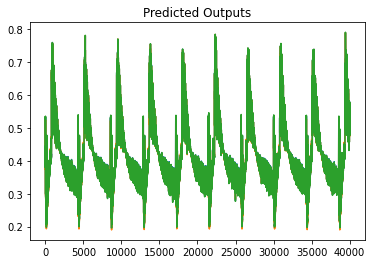

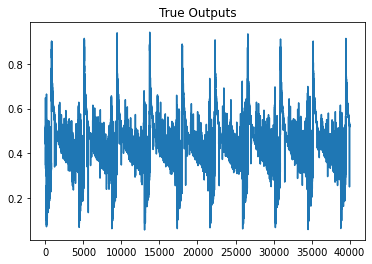

In [35]:
plt.cla
plt.figure(1)
plt.plot(predictOutputArray[1:40000])
plt.title('Predicted Outputs')
plt.figure(2)
plt.plot(testOutputsArray[1:40000])
plt.title('True Outputs')

In [29]:
inputsArray = inputsArray.reshape(len(inputsArray), 1, 22)
overfittingTestOutput = model.predict(inputsArray, verbose=1)

172015/172015 [==============================] - 318s 2ms/step


Text(0.5, 1.0, 'Overfitting Test True Outputs')

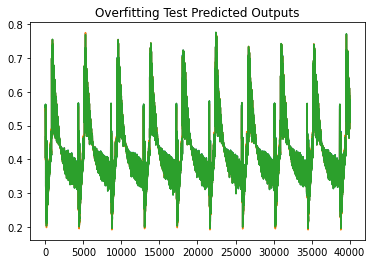

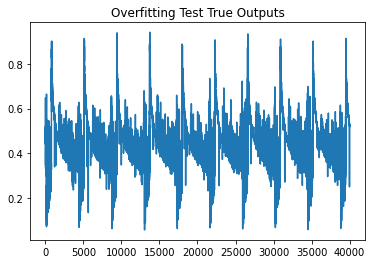

In [36]:
plt.figure(3)
plt.plot(overfittingTestOutput[1:40000])
plt.title('Overfitting Test Predicted Outputs')
plt.figure(4)
plt.plot(outputsArray[1:40000])
plt.title('Overfitting Test True Outputs')